# Walmart Sales Forecast

The dataset has weekly sales of 45 stores of USA

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import statsmodels.api as sm

In [31]:
os.chdir("E:\DS\Project\walmart_sales_forecasting-master")

In [32]:
train=pd.read_csv("train.csv")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [34]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [35]:
missing_data = pd.DataFrame((train.isnull().sum(axis=0)*100)/len(train))
# count the number of null values in the column and their perecentage of the total data
missing_data = missing_data.rename(columns = {'index':'Column', 0:'Missing Percentage'})
#missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Missing Percentage
Store,0.0
Dept,0.0
Date,0.0
Weekly_Sales,0.0
IsHoliday,0.0


In [36]:
train['Date']=pd.to_datetime(train['Date'])

In [37]:
train['Date'].dtype

dtype('<M8[ns]')

###### Summing all the cumulative sales of diffirent stores on the same dates together

In [38]:
ts = train.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [39]:
ts = ts.set_index('Date')
ts.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name=u'Date', length=143, freq=None)

In [40]:
ts.index.name = 'Date'

AttributeError: 'DataFrame' object has no attribute 'dtype'

###### Cumulative Sales Plot
The graph shows sales from 45 stores in US. We can notice that sales increases every year just before new year.

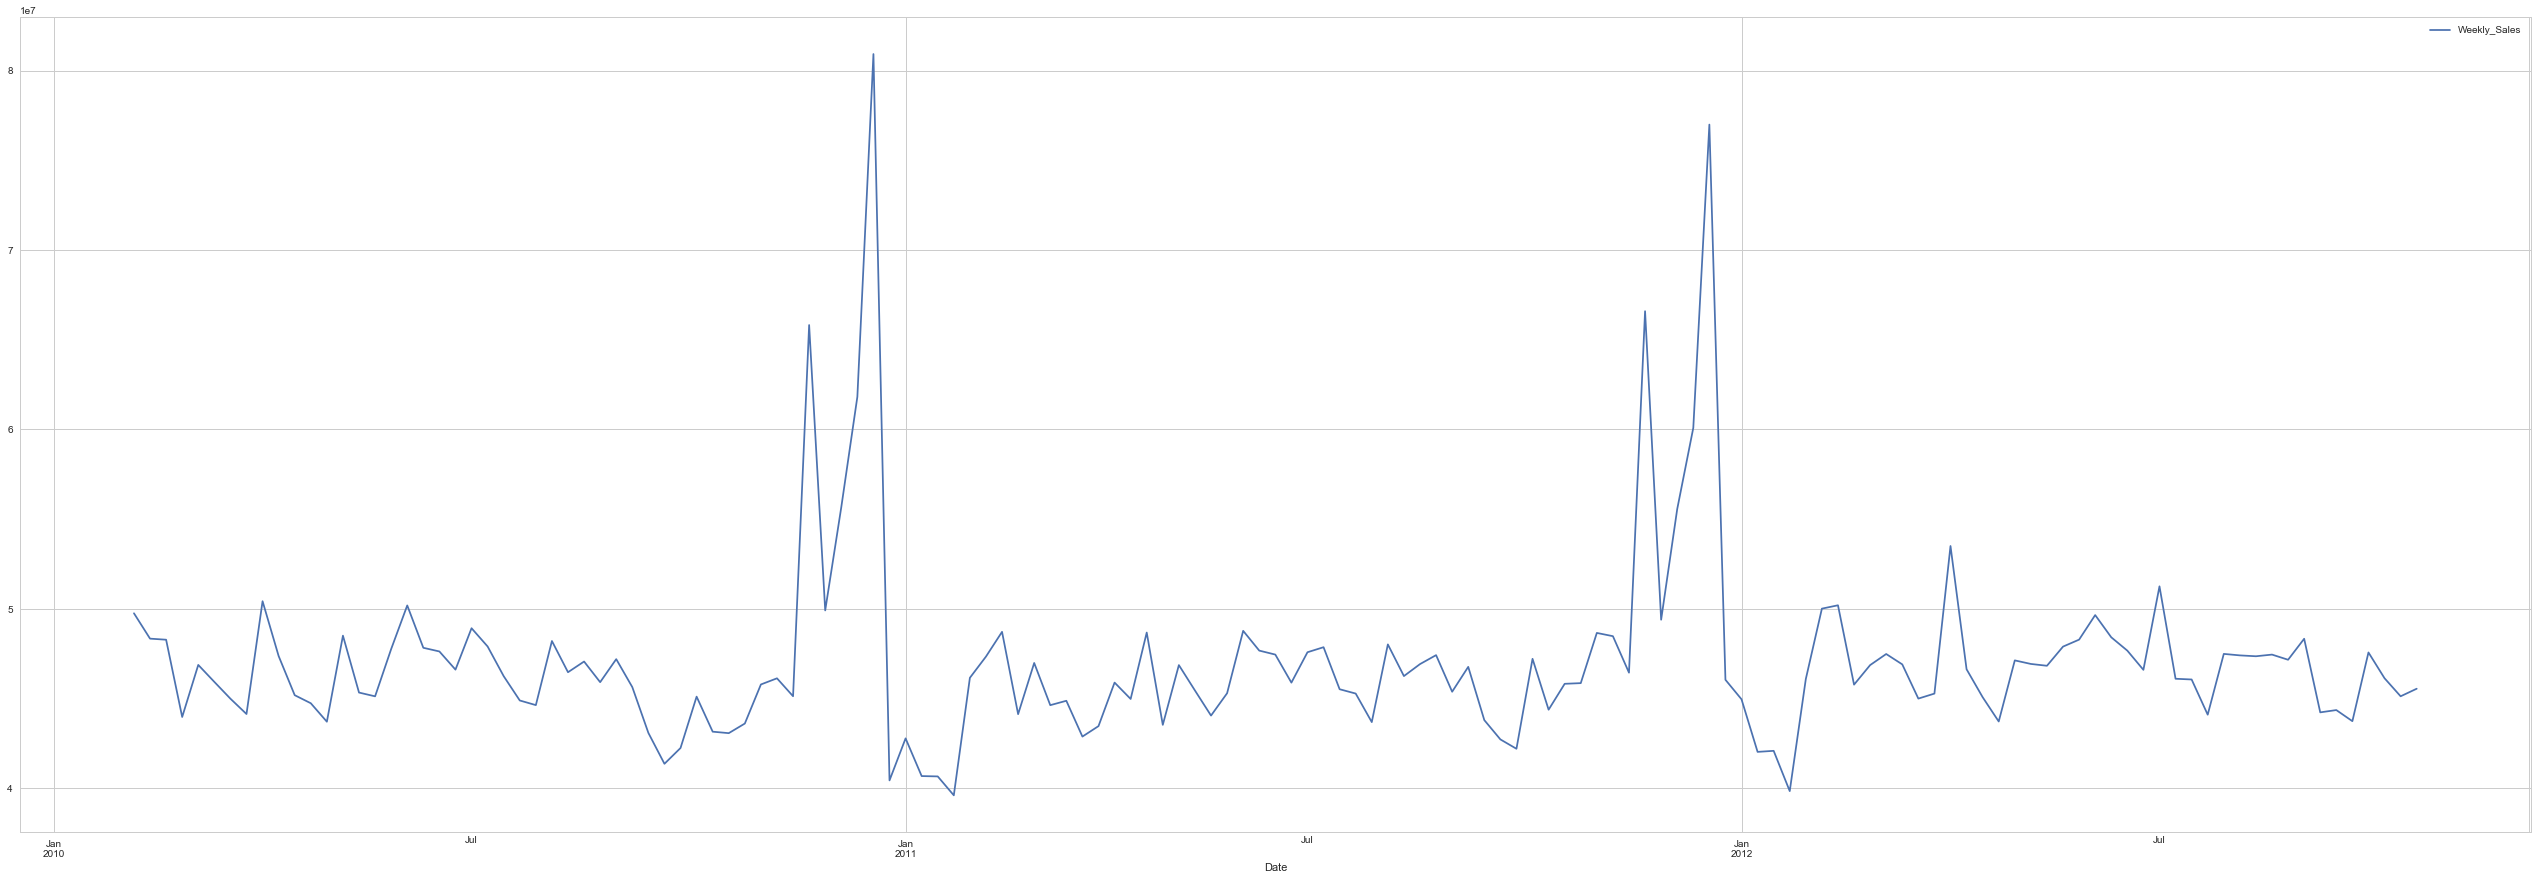

In [41]:
ts.plot(figsize=(45,15)) 

###### Stationarity  : Adfuller Test
 To determine the forecast a time series, it needs to be stationary. Adfuller test helps us in determining the stationarity of time sereis

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput,dftest

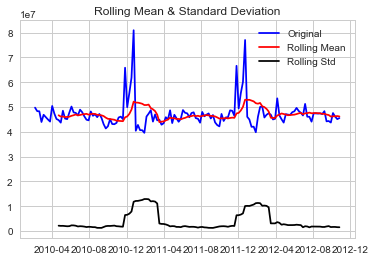

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (5%)           -2.882722e+00
Critical Value (1%)           -3.478648e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.908297957186321, 2.67597915898623e-07, 4L, 138L, {'5%': -2.882721765644168, '1%': -3.47864788917503, '10%': -2.578065326612056}, 4314.46014989216)


In [43]:
test_stationarity(ts['Weekly_Sales'])

Taking log of the time series to further achieve a level of stationarity

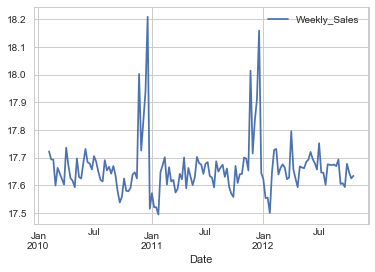

In [44]:
ts_log = np.log(ts)
ts_log.plot()

###### Gaps in TIme Series
Since we have weekly gaps in the time series, we need to set the frequency

In [45]:
ts.index = pd.DatetimeIndex(ts.index.values,
                               freq=ts.index.inferred_freq)
ts_log.index = pd.DatetimeIndex(ts_log.index.values,
                               freq=ts_log.index.inferred_freq)

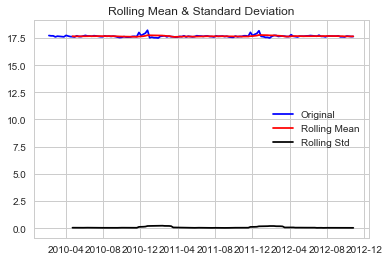

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (5%)           -2.882722e+00
Critical Value (1%)           -3.478648e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-6.332825845560076, 2.878282547251359e-08, 4L, 138L, {'5%': -2.882721765644168, '1%': -3.47864788917503, '10%': -2.578065326612056}, -255.70088316786007)


In [46]:
test_stationarity(ts_log['Weekly_Sales'])

In [47]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Freq: W-FRI
Data columns (total 1 columns):
Weekly_Sales    143 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


#### Eliminating Seasonality & Trends
1. Differencing : THis is specifically to remove the trend in the time series by differencing from the shifted version of same time series
2. Decomposing : It decomposes the time series into 3 parts such as TrenDs,Seasonality and Residual. We perform adfuller test on residual and if it's stationary we add trends and seasonality to the time series later after arima prediction, 

##### Differencing Method

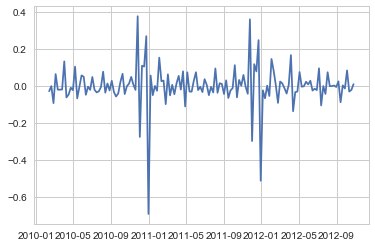

In [48]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff = ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff['Weekly_Sales'])
ts_log_diff

Setting the frequency of ts_log_diff

In [50]:
ts_log_diff.fillna(0,inplace=True)

In [51]:
ts_log_diff.index = pd.DatetimeIndex(ts_log_diff.index.values,
                               freq=ts_log_diff.index.inferred_freq)

##### Decomposing Method

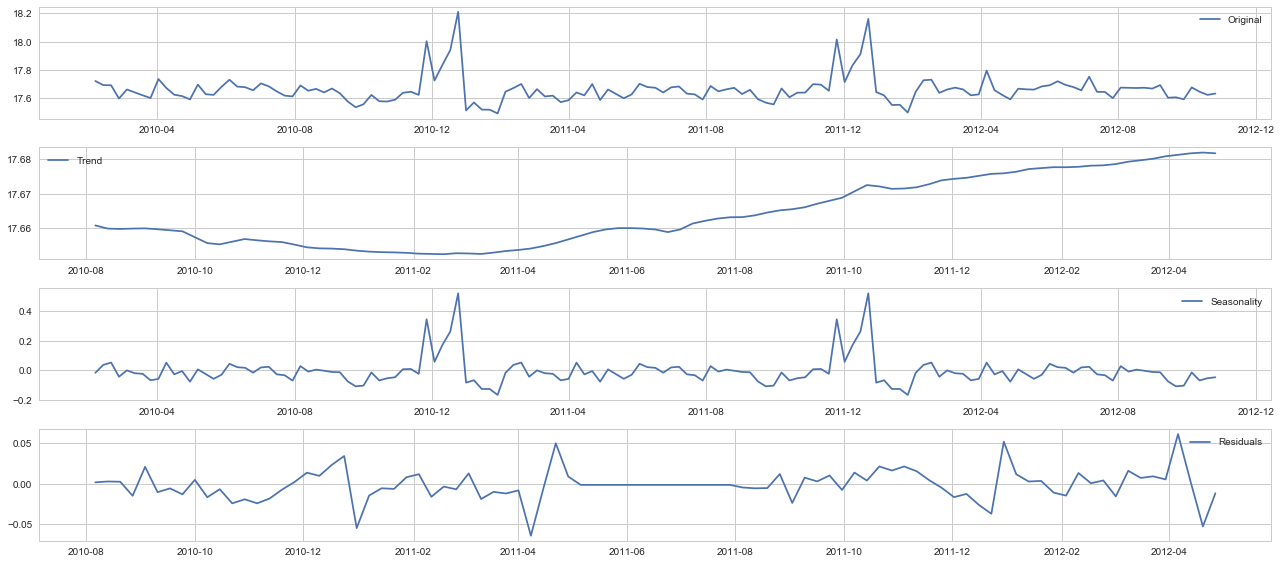

In [52]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#rcParams change the bydefault size of figure
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

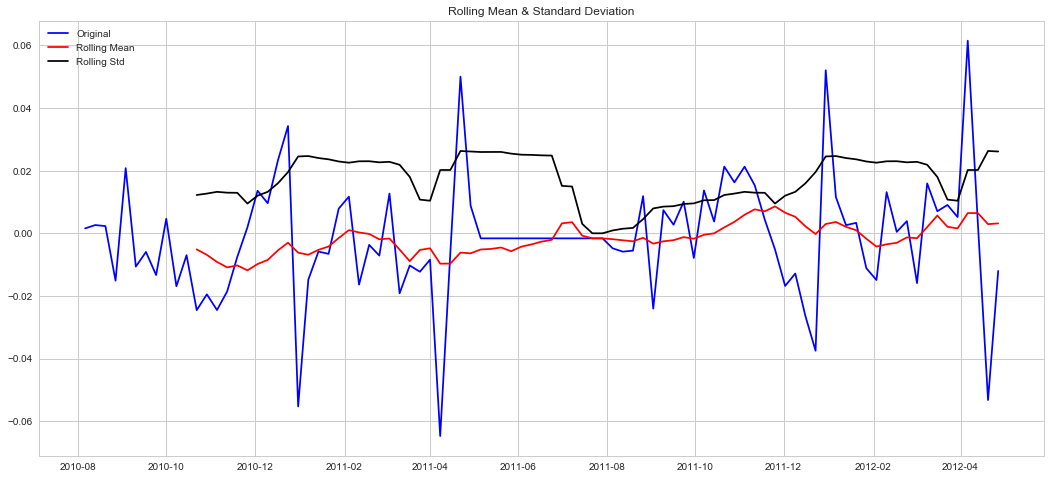

Results of Dickey-Fuller Test:
Test Statistic                -6.824472e+00
p-value                        1.963835e-09
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (5%)           -2.894607e+00
Critical Value (1%)           -3.506057e+00
Critical Value (10%)          -2.584410e+00
dtype: float64 (-6.824472145938953, 1.9638352001854417e-09, 1L, 89L, {'5%': -2.8946066061911946, '1%': -3.506057133647011, '10%': -2.5844100201994697}, -387.98816480089687)


In [53]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['Weekly_Sales'])

Seasonal decompose reduces the  time series into diffirent time series who either product(multiplicative model) or sum(additive model) makes the original time series. 

### Forecasting the Time Series

Plotting the ACF and PACF graph to determin p,q,d values

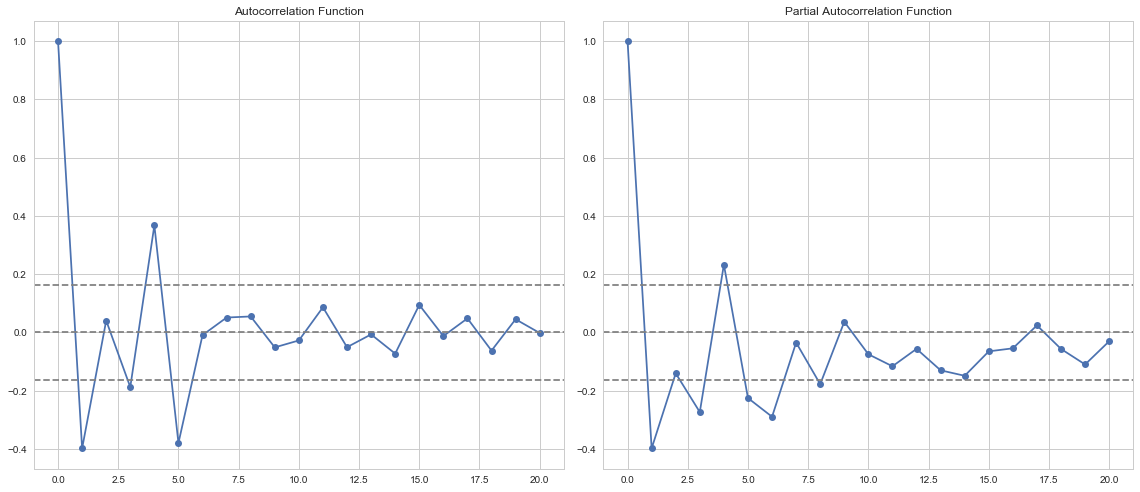

In [57]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

We notice that in ACF grah p = 1 (it is where it crosses the positive lag) and q = 1 (it is where pacf crosses the positive lag of) 

##### Auto Regression Model ()

In [55]:
from statsmodels.tsa.arima_model import ARIMA

##### Arima Model

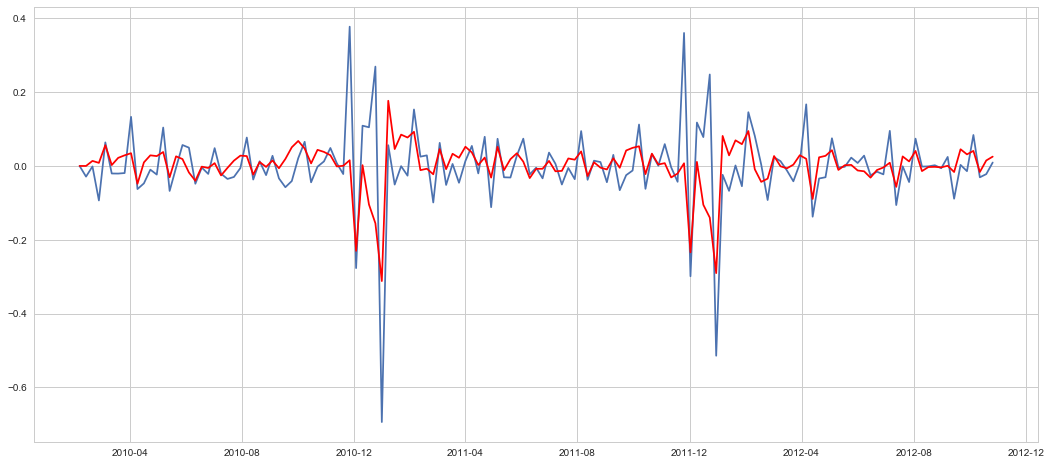

In [104]:

#Arima Model
model = ARIMA(ts_log_diff, order=(2, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [105]:
#Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model
RSS = (results_ARIMA.fittedvalues-ts_log_diff['Weekly_Sales'])**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.2014818989005103

RSS = 2.8652824766431704 for order=(3,1,0)
RSS = 2.8944551365379665 for order=(3,1,1)
###### RSS = 1.2014818989005103 for order=(2,0,1)
RSS = 1.4329622165497684 for order=(2,0,0)

In [130]:
results_ARIMA.fittedvalues

2010-02-05    0.000047
2010-02-12    0.000066
2010-02-19    0.013732
2010-02-26    0.008393
2010-03-05    0.056276
2010-03-12    0.002489
2010-03-19    0.021984
2010-03-26    0.028853
2010-04-02    0.034642
2010-04-09   -0.048277
2010-04-16    0.009731
2010-04-23    0.028851
2010-04-30    0.026767
2010-05-07    0.037857
2010-05-14   -0.030502
2010-05-21    0.026105
2010-05-28    0.018724
2010-06-04   -0.017703
2010-06-11   -0.040011
2010-06-18   -0.001818
2010-06-25   -0.005389
2010-07-02    0.007686
2010-07-09   -0.025604
2010-07-16   -0.005087
2010-07-23    0.014428
2010-07-30    0.028015
2010-08-06    0.026811
2010-08-13   -0.023424
2010-08-20    0.010720
2010-08-27   -0.002495
                ...   
2012-04-06    0.019386
2012-04-13   -0.089422
2012-04-20    0.023449
2012-04-27    0.027470
2012-05-04    0.042830
2012-05-11   -0.010731
2012-05-18    0.002012
2012-05-25    0.002893
2012-06-01   -0.012192
2012-06-08   -0.014414
2012-06-15   -0.031562
2012-06-22   -0.011030
2012-06-29 

##### Predicting future values
Predicted the forecast of log of original function

In [140]:
forecast = results_ARIMA.predict(start=143,end=159)

#### Getting Back the Original Function
Adding and Raising to exponent

In [141]:
forecast_cumsum = forecast.cumsum()

In [142]:
rng = pd.date_range('2012-11-02', periods=17, freq='W-FRI')
forecast_log = pd.Series(17.62, index=rng)
forecast_log = forecast_log.add(forecast_cumsum,fill_value=0)

In [143]:
forecast_ARIMA = np.exp(forecast_log)

In [147]:
forecast_ARIMA

2012-11-02    4.563878e+07
2012-11-09    4.594621e+07
2012-11-16    4.614969e+07
2012-11-23    4.626023e+07
2012-11-30    4.632549e+07
2012-12-07    4.636318e+07
2012-12-14    4.638562e+07
2012-12-21    4.639929e+07
2012-12-28    4.640801e+07
2013-01-04    4.641391e+07
2013-01-11    4.641821e+07
2013-01-18    4.642161e+07
2013-01-25    4.642449e+07
2013-02-01    4.642708e+07
2013-02-08    4.642950e+07
2013-02-15    4.643183e+07
2013-02-22    4.643410e+07
Freq: W-FRI, dtype: float64

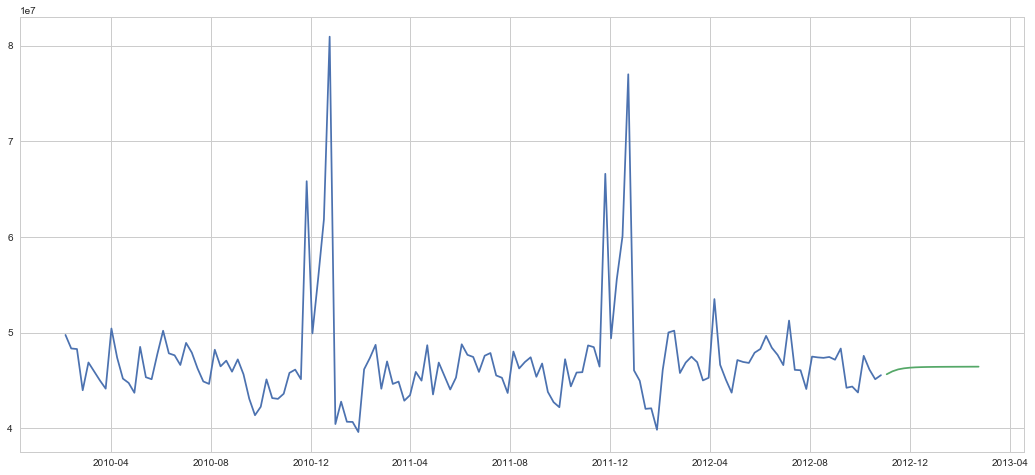

In [145]:
plt.plot(ts)
plt.plot(forecast_ARIMA)